# Algoritmo Random Forest

In [3]:
# Importando as libs que serão usadas
import pandas as pd
import numpy as np

In [18]:
# Importando as funções que serão usadas no código

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Importando a base de dados

df = pd.read_csv('tenis.csv', sep=';')

In [6]:
# Separando os atributos de entrada do atributo de classificação

X = df.loc[:, "Aparencia":"Ventando"]
y = df.loc[:, "Jogar"]

In [7]:
# Codificando os dados

X.loc[:, "Temperatura"] = LabelEncoder().fit_transform(X.loc[:, "Temperatura"])
X.loc[:, "Umidade"] = LabelEncoder().fit_transform(X.loc[:, "Umidade"])
X.loc[:, "Ventando"] = LabelEncoder().fit_transform(X.loc[:, "Ventando"])

onehotencoder_df = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), ["Aparencia"])], 
                                     remainder='passthrough')

X = onehotencoder_df.fit_transform(X)

In [8]:
# Dividindo os dados entre treino e teste
# Valores padroes para o random state são 0 e 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Antes de gerar um modelo iremos testar os melhores hiperparametros utilizando o RandomizedSearchCV

In [50]:
# Função que irá me retornar os melhoeres hiperparametros

def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=3)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [51]:
# Definindo os hiperparametros que serão testados

params = {'max_depth': [3,5,10,None],
              'n_estimators': [10,100,200,300,400,500],
              'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
               'criterion': ['gini','entropy'],
               'bootstrap': [True,False],
               'min_samples_leaf': [1, 2, 3, 4],
              }

In [52]:
# Achando os melhores hiperparametros

est = RandomForestClassifier(n_jobs=-1)
rf_parameters, rf_ht_score = hypertuning_rscv(est, params, 40, X, y)

print(rf_parameters)
print(rf_ht_score)

{'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 0.6, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
0.8666666666666667


In [53]:
# Gerando o modelo e treinando

model = RandomForestClassifier(n_jobs=-1, n_estimators=200,bootstrap=False,criterion='entropy',max_depth=10,max_features=0.6,min_samples_leaf= 1)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=0.6, n_estimators=200, n_jobs=-1)

In [54]:
# Testando o modelo

pred = model.predict(X_test)

print("Prediction: ", end="")
print(pred)
print("\n")
print("Expected result: ", end="")
print(np.array(y_test))
print("\n")
print("Acurracy: ", end="")
print(accuracy_score(y_test,pred))

Prediction: ['Nao' 'Sim' 'Sim']


Expected result: ['Nao' 'Nao' 'Sim']


Acurracy: 0.6666666666666666


[[1 1]
 [0 1]]




0.6666666666666666

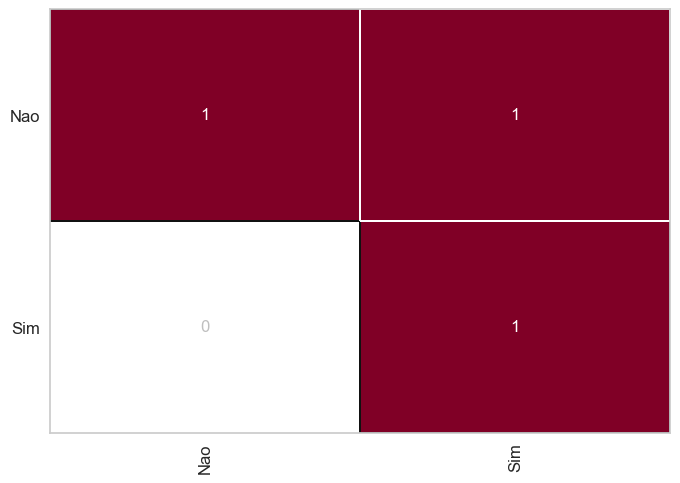

In [23]:
# Confusion Matrix

print(confusion_matrix(y_test,pred))
print("\n")

cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [24]:
# Classification Report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         Nao       1.00      0.50      0.67         2
         Sim       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

